In [1]:
import numpy as np
from matplotlib import pyplot as plt
from copy import deepcopy


class Normalizer:
    """
    The Great Normalizer
    """
    mins: np.ndarray
    maxs: np.ndarray
    span: np.ndarray
    mids: np.ndarray

    def __init__(self, reference_inputs: np.ndarray):
        self.mins = np.min(reference_inputs, 0)
        self.maxs = np.max(reference_inputs, 0)
        self.span = self.maxs - self.mins
        # mids = span / 2 + mins
        # and thus:
        # mids = (maxs + mins) / 2
        self.mids = (self.maxs + self.mins) / 2

    def scale(self, set: np.ndarray):
        # k0 = (reference_inputs[0] - mids) / (span / 2)
        # and thus:
        # k0 = 2*(reference_inputs[0] - mids) / span
        return 2 * np.subtract(set, self.mids) / self.span


def shp(n: np.ndarray):
    return n.reshape((-1, n.shape[-1]))


def val(x: np.ndarray, w, b):
    """
    input:
        `N`[1...inf) input rows(M,)
    return:
        `2D(N,M)` arr of predictions
    """
    return shp(np.dot(w, x.T)).T + b  # w is applied to N[1...inf) rows of x. Result: 2D(N, M) arr of predictions


def pred(x, w, b):
    return val(x, w, b)


def polynom(inputs: np.ndarray, degree=3):
    if degree < 2:
        raise Exception("Degree should be at least 2")

    transposed = inputs.T
    base = len(transposed)

    pols = []
    newgen = []
    for i in range(base):
        newgen.append([i])
    pols.extend(newgen)

    for deg in range(1, degree):
        lastgen = newgen
        newgen = []
        for p in lastgen:
            for i in range(p[-1], base):
                pnext = [*p, i]
                pnext.sort()
                newgen.append(pnext)
        pols.extend(newgen)

    new_inputs = []
    for p in pols:
        new_inputs.append(deepcopy(transposed[p[0]]))
        for i in p[1:]:
            new_inputs[-1] *= transposed[i]
    return np.array(new_inputs).T


def lambda_sum(w):
    return LAMBD * np.mean(w ** 2) / 2


def cost(f, y, w):
    return (np.mean((f - y)**2) + LAMBD * np.mean(w**2)) / 2


def gradient(x, w, b, y):
    f = pred(x, w, b)
    err = f - y
    gw = (np.dot(err.T, x) + LAMBD*w) / len(err)
    gb = np.mean(err)
    return gw, gb

dataset = np.array([
    [2104, 5, 1, 45, 460],
    [1416, 3, 2, 40, 232],
    [1534, 3, 2, 30, 315],
    [1600, 4, 2, 30, 389],
    [852, 2, 1, 36, 178],
])
x_train = dataset[:, :-1]
normer = Normalizer(x_train)
x_train = normer.scale(x_train)
y_train = dataset[:, -1:]
W = np.zeros((y_train.shape[-1],x_train.shape[-1]))
B = 0
ALPHA = 0.02
LAMBD = 0

print("COST:")
print(cost(pred(x_train, W, B), y_train, W))
gw, gb = gradient(x_train, W, B, y_train)


COST:
54765.4


0.018828813551857063: 100%|██████████| 10000/10000 [00:05<00:00, 1678.92it/s]


[[ 0.05229516]
 [-0.05987383]
 [ 0.32375753]
 [-0.273105  ]
 [-0.05062803]]


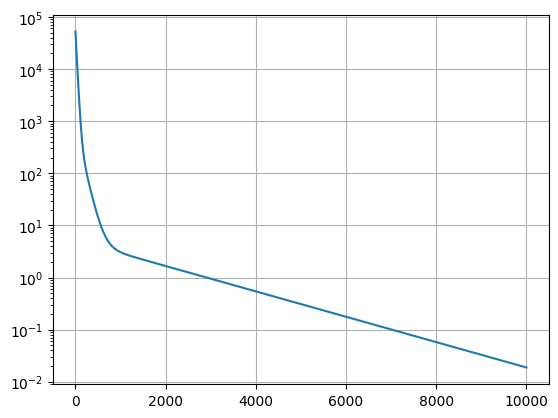

In [2]:
from tqdm import tqdm
from time import sleep
from matplotlib import pyplot as plt
costs = []
with tqdm(range(10000)) as pbar:
    for i in pbar:
        # sleep(1)
        gw, gb = gradient(x_train, W, B, y_train)
        W -= ALPHA*gw
        B -= ALPHA*gb
        costs.append(cost(pred(x_train, W, B), y_train, W))
        pbar.set_description(f"{costs[-1]}")

f = pred(x_train,W,B)
err = f - y_train
print(err)
plt.plot(costs)
plt.yscale('log')
plt.grid(True)
plt.show()

And now let's introduce LAMBDA:

216.35244840757719: 100%|██████████| 10000/10000 [00:05<00:00, 1677.78it/s]


[[-3.30362136]
 [ 7.08676074]
 [-0.83236862]
 [-5.14946974]
 [ 2.19839331]]


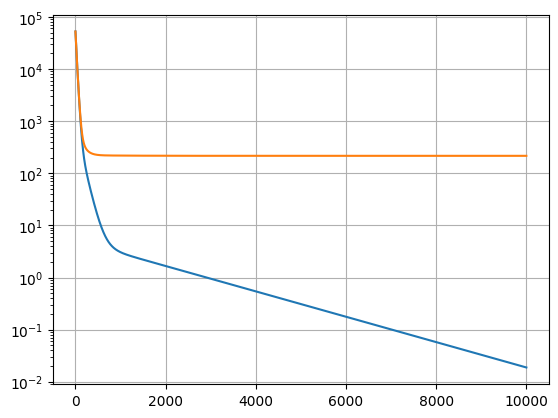

In [3]:
W = np.zeros((y_train.shape[-1],x_train.shape[-1]))
B = 0
LAMBD = 0.1
costs2 = []
with tqdm(range(10000)) as pbar:
    for i in pbar:
        # sleep(1)
        gw, gb = gradient(x_train, W, B, y_train)
        W -= ALPHA*gw
        B -= ALPHA*gb
        costs2.append(cost(pred(x_train, W, B), y_train, W))
        pbar.set_description(f"{costs2[-1]}")

f = pred(x_train,W,B)
err = f - y_train
print(err)
plt.plot(costs)
plt.plot(costs2)
plt.yscale('log')
plt.grid(True)
plt.show()